In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("diabetes.csv")
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<h2>Plots the relationship between the features and the response.</h2>

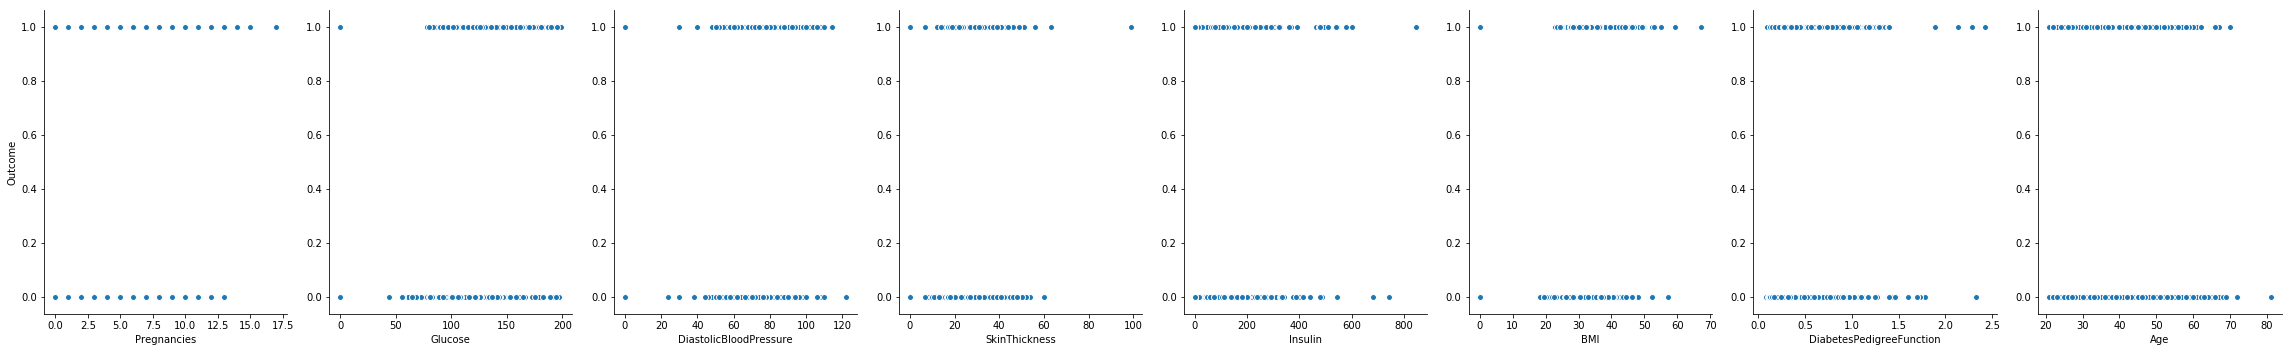

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x_columns=np.asarray(X.columns)
sns.pairplot(df, x_vars=x_columns, y_vars=["Outcome"],
             size=5, aspect=.8);

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=7)

In [73]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values="NaN", strategy='most_frequent', axis=0)
train_x_imputed = imputer.fit_transform(X_train)
test_x_imputed = imputer.fit_transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RandomForestClf = RandomForestClassifier()
RandomForestClf.fit(train_x_imputed, y_train)
hyp = RandomForestClf.predict(test_x_imputed)
print("RandomForest Classifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp)))

RandomForest Classifier Accuracy: 0.7727


In [26]:
from xgboost import XGBClassifier

XGBclf = XGBClassifier()
XGBclf.fit(train_x_imputed,y_train)
hyp = XGBclf.predict(test_x_imputed)
print("XGBClassifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp)))

XGBClassifier Accuracy: 0.7987


<h2>Optimise your classification to achieve the maximum performance by using GridSearchCV, Imputer(Most Frequence)</h2>
<h3> Tuning Imputer : Most Frequence</h3>

In [30]:
from sklearn.model_selection import cross_val_score,GridSearchCV

grid_params = {'criterion':['entropy','gini'],'max_depth': [2,3,4,5,6,7,8,9,10]}
GridSearchClf = GridSearchCV(RandomForestClf,grid_params)
GridSearchClf.fit(train_x_imputed,y_train)
hyp_grid = GridSearchClf.predict(test_x_imputed)
print("RandomForest Classifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp_grid)))

RandomForest Classifier Accuracy: 0.7922


In [31]:
grid_params = {'max_depth': [2,3,4,5,6,7,8,9,10]}
GridSearchClf_XGB = GridSearchCV(XGBclf,grid_params)
GridSearchClf_XGB.fit(train_x_imputed,y_train)
hyp_grid = GridSearchClf_XGB.predict(test_x_imputed)
print("XGBClassifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp_grid)))

XGBClassifier Accuracy: 0.8052


<h2>Optimise your classification to achieve the maximum performance by changing parameters forthe Imputer</h2>
<h3> Tuning Imputer : Mean</h3>

In [76]:
imputer_opt = Imputer(missing_values="NaN", strategy='mean', axis=0)
train_x_imputed_opt = imputer_opt.fit_transform(X_train)
test_x_imputed_opt = imputer_opt.fit_transform(X_test)

In [57]:
RandomForestClf = RandomForestClassifier()
RandomForestClf.fit(train_x_imputed_opt, y_train)
hyp = RandomForestClf.predict(test_x_imputed_opt)
print("RandomForest Classifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp)))

RandomForest Classifier Accuracy: 0.7468


In [58]:
XGBclf = XGBClassifier()
XGBclf.fit(train_x_imputed,y_train)
hyp = XGBclf.predict(test_x_imputed_opt)
print("XGBClassifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp)))

XGBClassifier Accuracy: 0.7987


<h2>Optimise your classification to achieve the maximum performance by using GridSearchCV using changed parameter imputer(Mean) </h2>
<h3> GridSearchCV</h3>

In [62]:
grid_params = {'criterion':['entropy','gini'],'max_depth': [2,3,4,5,6,7,8,9,10]}
GridSearchClf = GridSearchCV(RandomForestClf,grid_params)
GridSearchClf.fit(train_x_imputed_opt,y_train)
hyp_grid = GridSearchClf.predict(test_x_imputed_opt)
print("RandomForest Classifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp_grid)))

RandomForest Classifier Accuracy: 0.7857


In [60]:
grid_params = {'max_depth': [2,3,4,5,6,7,8,9,10]}
GridSearchClf_XGB = GridSearchCV(XGBclf,grid_params)
GridSearchClf_XGB.fit(train_x_imputed_opt,y_train)
hyp_grid = GridSearchClf_XGB.predict(test_x_imputed_opt)
print("XGBClassifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp_grid)))

XGBClassifier Accuracy: 0.8052


<h2>Optimise your classification to achieve the maximum performance by giving XGBClassifier parameters</h2>

In [77]:
XGBclf = XGBClassifier(learning_rate=0.01, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
XGBclf.fit(train_x_imputed,y_train)
hyp = XGBclf.predict(test_x_imputed_opt)
print("XGBClassifier Accuracy: %0.4f" % (accuracy_score(y_test,hyp)))

XGBClassifier Accuracy: 0.8117


<h2>Optimise your classification to achieve the maximum performance by using StratifiedKFold and GridSearch </h2>

In [90]:
from sklearn.model_selection import StratifiedKFold

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGBclf, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_x_imputed,y_train)
grid_hyp = grid_search.predict(test_x_imputed_opt)
print("XGBClassifier Accuracy: %0.4f" % (accuracy_score(y_test,grid_hyp)))

XGBClassifier Accuracy: 0.8117


In [91]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.486981 using {'learning_rate': 0.01}


In [94]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGBclf, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_x_imputed,y_train)
grid_hyp = grid_search.predict(test_x_imputed_opt)
print("XGBClassifier Accuracy: %0.4f" % (accuracy_score(y_test,grid_hyp)))

XGBClassifier Accuracy: 0.8052
